<a href="https://colab.research.google.com/github/iktoning/RekomendasiBuku/blob/Yoga-Branch/Rekomendasibuku.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! chmod 600 /content/kaggle.json

In [ ]:
! KAGGLE_CONFIG_DIR=/content/ kaggle datasets download -d arashnic/book-recommendation-dataset

 38% 9.00M/23.8M [00:00<00:00, 40.5MB/s]
100% 23.8M/23.8M [00:00<00:00, 86.3MB/s]


In [ ]:
import zipfile
zip_file = zipfile.ZipFile('/content/book-recommendation-dataset.zip','r')
zip_file.extractall('/tmp/')

In [ ]:
import pandas as pd

In [ ]:
user = pd.read_csv('/tmp/Users.csv')
ratings = pd.read_csv('/tmp/Ratings.csv')
books = pd.read_csv('/tmp/Books.csv')

<ipython-input-7-cd736f7f1f97>:3: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  books = pd.read_csv('/tmp/Books.csv')


In [ ]:
print(user.head())

   User-ID                            Location   Age
0        1                  nyc, new york, usa   NaN
1        2           stockton, california, usa  18.0
2        3     moscow, yukon territory, russia   NaN
3        4           porto, v.n.gaia, portugal  17.0
4        5  farnborough, hants, united kingdom   NaN


In [ ]:
print(ratings.head())

   User-ID        ISBN  Book-Rating
0   276725  034545104X            0
1   276726  0155061224            5
2   276727  0446520802            0
3   276729  052165615X            3
4   276729  0521795028            6


In [ ]:
print(books.head())

         ISBN                                         Book-Title  \
0  0195153448                                Classical Mythology   
1  0002005018                                       Clara Callan   
2  0060973129                               Decision in Normandy   
3  0374157065  Flu: The Story of the Great Influenza Pandemic...   
4  0393045218                             The Mummies of Urumchi   

            Book-Author Year-Of-Publication                   Publisher  \
0    Mark P. O. Morford                2002     Oxford University Press   
1  Richard Bruce Wright                2001       HarperFlamingo Canada   
2          Carlo D'Este                1991             HarperPerennial   
3      Gina Bari Kolata                1999        Farrar Straus Giroux   
4       E. J. W. Barber                1999  W. W. Norton &amp; Company   

                                         Image-URL-S  \
0  http://images.amazon.com/images/P/0195153448.0...   
1  http://images.amazon.com/

In [ ]:
user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


In [ ]:
user = user[1:10001]
user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 1 to 10000
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User-ID   10000 non-null  int64  
 1   Location  10000 non-null  object 
 2   Age       6274 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 234.5+ KB


In [ ]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


In [ ]:
ratings = ratings[1:10001]
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 1 to 10000
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   User-ID      10000 non-null  int64 
 1   ISBN         10000 non-null  object
 2   Book-Rating  10000 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 234.5+ KB


In [ ]:
ratings.describe()

,User-ID,Book-Rating
count,10000.000000,10000.000000
mean,265816.731400,1.974700
std,56999.000622,3.424884
min,2.000000,0.000000
25%,277478.000000,0.000000
50%,278418.000000,0.000000
75%,278418.000000,4.000000
max,278854.000000,10.000000


In [ ]:
print('Jumlah user-ID: ', len(ratings['User-ID'].unique()))
print('Jumlah ISBN: ', len(ratings['ISBN'].unique()))
print('Jumlah data rating buku: ', len(ratings['Book-Rating']))

Jumlah user-ID:  940
Jumlah ISBN:  9340
Jumlah data rating buku:  10000


In [ ]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271359 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


In [ ]:
books = books[1:10001]
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 1 to 10000
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ISBN                 10000 non-null  object
 1   Book-Title           10000 non-null  object
 2   Book-Author          10000 non-null  object
 3   Year-Of-Publication  10000 non-null  object
 4   Publisher            10000 non-null  object
 5   Image-URL-S          10000 non-null  object
 6   Image-URL-M          10000 non-null  object
 7   Image-URL-L          10000 non-null  object
dtypes: object(8)
memory usage: 625.1+ KB


In [ ]:
print('Banyak Judul Buku: ', len(books['Book-Title'].unique()))
print('Judul Buku: ', books['Book-Title'].unique())

Banyak Judul Buku:  9553
Judul Buku:  ['Clara Callan' 'Decision in Normandy'
 'Flu: The Story of the Great Influenza Pandemic of 1918 and the Search for the Virus That Caused It'
 ... 'Tod in der Datscha.' 'Dunkel.' 'Whispers (Glenbrooke)']


In [ ]:
books = books.drop(columns=['Image-URL-S', 'Image-URL-M', 'Image-URL-L'], axis=1)
books

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company
5,0399135782,The Kitchen God's Wife,Amy Tan,1991,Putnam Pub Group
...,...,...,...,...,...
9996,0862418879,The Star Rover,Jack London,2000,Canongate Books
9997,340414645X,Die Keltennadel.,Patrick Dunne,2001,LÃ?Â¼bbe
9998,3442730988,Tod in der Datscha.,Anna Malyschewa,2003,btb
9999,3404144783,Dunkel.,Wolfgang Hohlbein,2001,LÃ?Â¼bbe


In [ ]:
ratings.isnull().sum()

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

In [ ]:
ratings.groupby('ISBN').sum()

,User-ID,Book-Rating
ISBN,,
0002005018,8,5
0002231115,277962,0
0002232766,277962,0
0002240114,277996,6
000225669X,276912,6
...,...,...
B0000BLD7X,276762,0
B158991965,276884,6
DITISEENSOORT,278559,0


In [ ]:
all_ratings = ratings
all_ratings

,User-ID,ISBN,Book-Rating
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6
5,276733,2080674722,0
...,...,...,...
9996,243,0440224764,0
9997,243,0440225701,0
9998,243,0440226430,0
9999,243,0440234743,0


In [ ]:
all_books = pd.merge(all_ratings, books[['ISBN','Book-Title','Book-Author']], on='ISBN', how='left')
all_books

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author
0,276726,0155061224,5,NaN,NaN
1,276727,0446520802,0,NaN,NaN
2,276729,052165615X,3,NaN,NaN
3,276729,0521795028,6,NaN,NaN
4,276733,2080674722,0,NaN,NaN
...,...,...,...,...,...
9995,243,0440224764,0,The Partner,John Grisham
9996,243,0440225701,0,The Street Lawyer,JOHN GRISHAM
9997,243,0440226430,0,Summer Sisters,Judy Blume
9998,243,0440234743,0,The Testament,John Grisham


In [ ]:
all_books.isnull().sum()

User-ID           0
ISBN              0
Book-Rating       0
Book-Title     8172
Book-Author    8172
dtype: int64

In [ ]:
len(all_books)

10000

In [ ]:
all_books_clean = all_books.dropna()
all_books_clean

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author
7,276744,038550120X,7,A Painted House,JOHN GRISHAM
9,276746,0425115801,0,Lightning,Dean R. Koontz
10,276746,0449006522,0,Manhattan Hunt Club,JOHN SAUL
11,276746,0553561618,0,Dark Paradise,TAMI HOAG
12,276746,055356451X,0,Night Sins,TAMI HOAG
...,...,...,...,...,...
9995,243,0440224764,0,The Partner,John Grisham
9996,243,0440225701,0,The Street Lawyer,JOHN GRISHAM
9997,243,0440226430,0,Summer Sisters,Judy Blume
9998,243,0440234743,0,The Testament,John Grisham


In [ ]:
all_books_clean.isnull().sum()

User-ID        0
ISBN           0
Book-Rating    0
Book-Title     0
Book-Author    0
dtype: int64

In [ ]:
preparation = all_books_clean.sort_values('ISBN', ascending=True)
preparation

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author
9562,8,0002005018,5,Clara Callan,Richard Bruce Wright
9881,190,0002740230,7,Keep It Simple: And Get More Out of Life,Nick Page
4332,278418,0020418809,0,CADDIE WOODLAWN,Carol Ryrie Brink
4336,278418,0020442203,0,"Lion, the Witch and the Wardrobe",C.S. Lewis
4337,278418,0020442408,0,Prince Caspian,C. S. Lewis
...,...,...,...,...,...
388,276888,884590184X,0,Siddharta Romanzo Versione Di M Mila,Hermann Hesse
516,276925,950491036X,10,La Sombra del Viento,Carlos Ruiz Zafon
2237,277509,9724115380,9,A hora de SertÃ³rio (Finisterra),JoÃ£o Aguiar
9715,160,9724119378,0,O Deus Das Pequenas Coisas,Roy


In [ ]:
preparation = preparation.drop_duplicates('ISBN')
preparation

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author
9562,8,0002005018,5,Clara Callan,Richard Bruce Wright
9881,190,0002740230,7,Keep It Simple: And Get More Out of Life,Nick Page
4332,278418,0020418809,0,CADDIE WOODLAWN,Carol Ryrie Brink
4336,278418,0020442203,0,"Lion, the Witch and the Wardrobe",C.S. Lewis
4337,278418,0020442408,0,Prince Caspian,C. S. Lewis
...,...,...,...,...,...
388,276888,884590184X,0,Siddharta Romanzo Versione Di M Mila,Hermann Hesse
516,276925,950491036X,10,La Sombra del Viento,Carlos Ruiz Zafon
2237,277509,9724115380,9,A hora de SertÃ³rio (Finisterra),JoÃ£o Aguiar
9715,160,9724119378,0,O Deus Das Pequenas Coisas,Roy


In [ ]:
book_id = preparation['ISBN'].tolist()

book_author = preparation['Book-Author'].tolist()

book_title = preparation['Book-Title'].tolist()

print(len(book_id))
print(len(book_author))
print(len(book_title))

1365
1365
1365


In [ ]:
book_new = pd.DataFrame({
    'id': book_id,
    'book_author': book_author,
    'book_title': book_title
})
book_new

,id,book_author,book_title
0,0002005018,Richard Bruce Wright,Clara Callan
1,0002740230,Nick Page,Keep It Simple: And Get More Out of Life
2,0020418809,Carol Ryrie Brink,CADDIE WOODLAWN
3,0020442203,C.S. Lewis,"Lion, the Witch and the Wardrobe"
4,0020442408,C. S. Lewis,Prince Caspian
...,...,...,...
1360,884590184X,Hermann Hesse,Siddharta Romanzo Versione Di M Mila
1361,950491036X,Carlos Ruiz Zafon,La Sombra del Viento
1362,9724115380,JoÃ£o Aguiar,A hora de SertÃ³rio (Finisterra)
1363,9724119378,Roy,O Deus Das Pequenas Coisas


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Inisialisasi TfidfVectorizer
tf = TfidfVectorizer()

# Melakukan perhitungan idf pada data 'book_title'
tf.fit(book_new['book_title'])

# Mapping array dari fitur index integer ke fitur nama
tf.get_feature_names_out()

array(['00', '000', '01', ..., 'â¼fung', 'â¼gt', 'â¼sse'], dtype=object)

In [ ]:
tfidf_matrix = tf.fit_transform(book_new['book_title'])

tfidf_matrix.shape

(1365, 2501)

In [ ]:
tfidf_matrix.todense()

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
pd.DataFrame(
    tfidf_matrix.todense(),
    columns=tf.get_feature_names_out(),
    index=book_new.book_author
).sample(1541, axis=1).sample(10, axis=0)

,gedã,listener,crow,schlecht,middle,mcdonald,anillo,ella,escrito,classiques,...,sisters,changing,outer,myron,myth,gangster,goblins,illuminated,mars,hearts
book_author,,,,,,,,,,,,,,,,,,,,,
Stephen King,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Tim Lahaye,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Gabriel Marques Garcia,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Robin Cook,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
The Onion,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
LAURA HILLENBRAND,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Janet Fitch,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
James Patterson,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Stuart Woods,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
cosine_sim = cosine_similarity(tfidf_matrix)
cosine_sim

array([[1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.14157509],
       [0.        , 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.14157509, 0.        ,
        1.        ]])

In [ ]:
cosine_sim_df = pd.DataFrame(cosine_sim, index=book_new['book_author'], columns=book_new['book_author'])
print('Shape:', cosine_sim_df.shape)

cosine_sim_df.sample(7, axis=1).sample(10, axis=0)

Shape: (1365, 1365)


book_author,Judy Blume,Kay Hooper,Stuart Woods,V.C. Andrews,Laura Esquivel,Fannie Flagg,Anne Frasier
book_author,,,,,,,
Dean R. Koontz,0.0,0.000000,0.0,0.0,0.0000,0.000000,0.0
Kevin J. Anderson,0.0,0.079449,0.0,0.0,0.0201,0.009739,0.0
IAN MCEWAN,0.0,0.000000,0.0,0.0,0.0000,0.000000,0.0
Stephen King,0.0,0.000000,0.0,0.0,0.0000,0.000000,0.0
Stephan Jaramillo,0.0,0.000000,0.0,0.0,0.0000,0.000000,0.0
TAMI HOAG,0.0,0.000000,0.0,0.0,0.0000,0.000000,0.0
James Patterson,0.0,0.000000,0.0,0.0,0.0000,0.000000,0.0
Oscar Wilde,0.0,0.000000,0.0,0.0,0.0000,0.000000,0.0
Anne Rice,0.0,0.000000,0.0,0.0,0.0000,0.000000,0.0


In [ ]:
def book_recommendations(nama_author, similarity_data=cosine_sim_df, items=book_new[['book_author', 'book_title']], n=10):

    index = similarity_data.loc[:,nama_author].to_numpy().argpartition(
        range(-1, -n, -1))

    closest = similarity_data.columns[index[-1:-(n+2):-1]]

    closest = closest.drop(nama_author, errors='ignore')

    return pd.DataFrame(closest).merge(items).head(n)

In [ ]:
book_new[book_new.book_author.eq('Peter Carey')]

,id,book_author,book_title
331,0375410848,Peter Carey,True History of the Kelly Gang


In [ ]:
book_recommendations('Peter Carey')

,book_author,book_title
0,DONNA TARTT,Secret History
1,Luanne Rice,Summer Light
2,Luanne Rice,Safe Harbor
3,Luanne Rice,True Blue
4,Jostein Gaarder,Sophie's World: A Novel About the History of P...
5,Sebastian Junger,The Perfect Storm: A True Story of Men Against...
6,Robert Hendrickson,More Cunning Than Man: A Social History of Rat...
7,Adeline Yen Mah,Falling Leaves: The True Story of an Unwanted ...
8,Marc Levy,If Only It Were True
9,Wally Lamb,I Know This Much Is True


In [ ]:
import pandas as pd
import numpy as np
from zipfile import ZipFile
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from pathlib import Path
import matplotlib.pyplot as plt

In [ ]:
df = ratings
df

,User-ID,ISBN,Book-Rating
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6
5,276733,2080674722,0
...,...,...,...
9996,243,0440224764,0
9997,243,0440225701,0
9998,243,0440226430,0
9999,243,0440234743,0


In [ ]:
user_ids = df['User-ID'].unique().tolist()
print('list User-ID: ', user_ids)

user_to_user_encoded = {x: i for i, x in enumerate(user_ids)}
print('encoded User-ID : ', user_to_user_encoded)

user_encoded_to_user = {i: x for i, x in enumerate(user_ids)}
print('encoded angka ke User-ID: ', user_encoded_to_user)

list User-ID:  [276726, 276727, 276729, 276733, 276736, 276737, 276744, 276745, 276746, 276747, 276748, 276751, 276754, 276755, 276760, 276762, 276765, 276768, 276772, 276774, 276780, 276786, 276788, 276796, 276798, 276800, 276803, 276804, 276806, 276808, 276811, 276812, 276813, 276814, 276817, 276820, 276822, 276827, 276828, 276830, 276832, 276833, 276835, 276837, 276838, 276840, 276842, 276847, 276848, 276850, 276852, 276853, 276854, 276856, 276857, 276859, 276861, 276862, 276863, 276866, 276869, 276870, 276872, 276873, 276875, 276878, 276879, 276884, 276887, 276888, 276889, 276890, 276896, 276904, 276905, 276911, 276912, 276915, 276916, 276925, 276927, 276928, 276929, 276934, 276936, 276939, 276943, 276946, 276949, 276950, 276953, 276954, 276957, 276959, 276963, 276964, 276965, 276975, 276981, 276984, 276986, 276988, 276989, 276990, 276992, 276994, 276997, 276998, 277002, 277007, 277009, 277010, 277012, 277018, 277019, 277022, 277023, 277028, 277031, 277032, 277035, 277036, 277040, 

In [ ]:
book_ids = df['ISBN'].unique().tolist()

book_to_book_encoded = {x: i for i, x in enumerate(book_ids)}

book_encoded_to_book = {i: x for i, x in enumerate(book_ids)}

df['user'] = df['User-ID'].map(user_to_user_encoded)

df['book'] = df['ISBN'].map(book_to_book_encoded)

In [ ]:
num_users = len(user_to_user_encoded)
print(num_users)

num_book = len(book_encoded_to_book)
print(num_book)

df['Book-Rating'] = df['Book-Rating'].values.astype(np.float32)

min_rating = min(df['Book-Rating'])

max_rating = max(df['Book-Rating'])

print('Number of User: {}, Number of Book: {}, Min Rating: {}, Max Rating: {}'.format(
    num_users, num_book, min_rating, max_rating
))

940
9340
Number of User: 940, Number of Book: 9340, Min Rating: 0.0, Max Rating: 10.0


In [ ]:
df = df.sample(frac=1, random_state=42)
df

,User-ID,ISBN,Book-Rating,user,book
6253,278418,0439207401,0.0,677,5902
4685,278418,0307100359,0.0,677,4379
1732,277427,0553579274,0.0,254,1686
4743,278418,0307111326,0.0,677,4436
4522,278418,0140491503,0.0,677,4218
...,...,...,...,...,...
5735,278418,0373706421,0.0,677,5401
5192,278418,0373074174,0.0,677,4870
5391,278418,0373122322,0.0,677,5066
861,277087,8474541913,8.0,138,850


In [ ]:
x = df[['user', 'book']].values

y = df['Book-Rating'].apply(lambda x: (x - min_rating) / (max_rating - min_rating)).values

train_indices = int(0.8 * df.shape[0])
x_train, x_val, y_train, y_val = (
    x[:train_indices],
    x[train_indices:],
    y[:train_indices],
    y[train_indices:]
)

print(x, y)

[[ 677 5902]
 [ 677 4379]
 [ 254 1686]
 ...
 [ 677 5066]
 [ 138  850]
 [ 677 6857]] [0.  0.  0.  ... 0.  0.8 0. ]


In [ ]:
class RecommenderNet(tf.keras.Model):

  # Insialisasi fungsi
  def __init__(self, num_users, num_book, embedding_size, **kwargs):
    super(RecommenderNet, self).__init__(**kwargs)
    self.num_users = num_users
    self.num_book = num_book
    self.embedding_size = embedding_size
    self.user_embedding = layers.Embedding( # layer embedding user
        num_users,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.user_bias = layers.Embedding(num_users, 1) # layer embedding user bias
    self.book_embedding = layers.Embedding( # layer embeddings book
        num_book,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.book_bias = layers.Embedding(num_book, 1) # layer embedding book bias

  def call(self, inputs):
    user_vector = self.user_embedding(inputs[:,0]) # memanggil layer embedding 1
    user_bias = self.user_bias(inputs[:, 0]) # memanggil layer embedding 2
    book_vector = self.book_embedding(inputs[:, 1]) # memanggil layer embedding 3
    book_bias = self.book_bias(inputs[:, 1]) # memanggil layer embedding 4

    dot_user_book = tf.tensordot(user_vector, book_vector, 2)

    x = dot_user_book + user_bias + book_bias

    return tf.nn.sigmoid(x) # activation sigmoid

In [ ]:
model = RecommenderNet(num_users, num_book, 50)
model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = keras.optimizers.Adam(learning_rate=0.001),
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)

In [ ]:
history = model.fit(
    x = x_train,
    y = y_train,
    batch_size = 8,
    epochs = 100,
    validation_data = (x_val, y_val)
)

Epoch 1/100
1000/1000 [==============================] - 14s 12ms/step - loss: 0.6075 - root_mean_squared_error: 0.4082 - val_loss: 0.5335 - val_root_mean_squared_error: 0.3650
Epoch 2/100
1000/1000 [==============================] - 7s 7ms/step - loss: 0.4197 - root_mean_squared_error: 0.3033 - val_loss: 0.4866 - val_root_mean_squared_error: 0.3379
Epoch 3/100
1000/1000 [==============================] - 8s 8ms/step - loss: 0.3952 - root_mean_squared_error: 0.2904 - val_loss: 0.4462 - val_root_mean_squared_error: 0.3167
Epoch 4/100
1000/1000 [==============================] - 8s 8ms/step - loss: 0.3692 - root_mean_squared_error: 0.2746 - val_loss: 0.4164 - val_root_mean_squared_error: 0.3032
Epoch 5/100
1000/1000 [==============================] - 7s 7ms/step - loss: 0.3463 - root_mean_squared_error: 0.2609 - val_loss: 0.3979 - val_root_mean_squared_error: 0.2958
Epoch 6/100
1000/1000 [==============================] - 11s 11ms/step - loss: 0.3339 - root_mean_squared_error: 0.2531 - v

In [ ]:
book_df = book_new
data = pd.read_csv('/tmp/Ratings.csv')
df = data[1:10001]

# Mengambil sample user
user_id = df['User-ID'].sample(100).iloc[30]
book_visited_by_user = df[df['User-ID'] == user_id]

# Operator bitwise (~)
book_not_visited = book_df[~book_df['id'].isin(book_visited_by_user.ISBN.values)]['id']
book_not_visited = list(
    set(book_not_visited)
    .intersection(set(book_to_book_encoded.keys()))
)

book_not_visited = [[book_to_book_encoded.get(x)] for x in book_not_visited]
user_encoder = user_to_user_encoded.get(user_id)
user_book_array = np.hstack(
    ([[user_encoder]] * len(book_not_visited), book_not_visited)
)

In [ ]:
rating = model.predict(user_book_array).flatten()

top_rating_indices = rating.argsort()[-10:][::-1]
recommended_book_ids = [
    book_encoded_to_book.get(book_not_visited[x][0]) for x in top_rating_indices
]

print('Menampilkan Rekomendasi  Book_Author untuk Pengguna dengan Total : {} Pengguna'.format(user_id))
print('===' * 11)
top_book_user = (
    book_visited_by_user.sort_values(
        by = 'Book-Rating',
        ascending=False
    )
    .head(5)
    .ISBN.values
)

book_df_rows = book_df[book_df['id'].isin(top_book_user)]
for row in book_df_rows.itertuples():
    print(row.book_author, ':', row.book_title)

print('---' * 11)
print('Top 10 Book_Author Recommendation')
print('---' * 11)

recommended_book = book_df[book_df['id'].isin(recommended_book_ids)]
for row in recommended_book.itertuples():
    print(row.book_author, ':', row.book_title)

43/43 [==============================] - 0s 1ms/step
Menampilkan Rekomendasi  Book_Author untuk Pengguna dengan Total : 277439 Pengguna
Alice Sebold : The Lovely Bones: A Novel
Stuart Woods : Dirty Work
Dan Brown : Angels &amp; Demons
---------------------------------
Top 10 Book_Author Recommendation
---------------------------------
Robert Penn Warren : All the King's Men
Norton Juster : The Phantom Tollbooth
William Gerald Golding : Lord of the Flies
Maeve Binchy : This Year It Will Be Different: And Other Stories
Stephen King : The Green Mile
SUZANNE FISHER STAPLES : Haveli (Laurel Leaf Books)
Robert Jordan : The Fires of Heaven (The Wheel of Time, Book 5)
Jack Canfield : Chicken Soup for the Pet Lover's Soul (Chicken Soup for the Soul)
Schiller : Kabale Und Liebe
Ray Bradbury : Die Mechanismen der Freude. ErzÃ?Â¤hlungen.


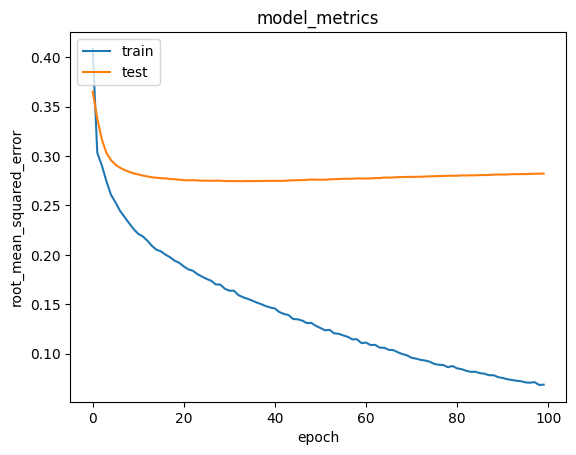

In [ ]:
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('model_metrics')
plt.ylabel('root_mean_squared_error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error
print("MSE dari pada data train = ", mean_squared_error(y_true=y_train, y_pred=model.predict(x_train))/1e3)
print("MSE dari pada data validation = ", mean_squared_error(y_true=y_val, y_pred=model.predict(x_val))/1e3)

250/250 [==============================] - 0s 1ms/step
MSE dari pada data train =  2.3050861675001592e-05
63/63 [==============================] - 0s 1ms/step
MSE dari pada data validation =  7.958461817345988e-05
